# Modelagem dataset professores  com  árvore de decisão

## Importando as Bibliotecas Necessárias

In [4]:
import pandas as pd
import numpy as numpy
import matplotlib.pyplot as pyplot
import seaborn as sns
%matplotlib inline

## Carregando o dataset

In [5]:
#Carregando o Datset
pathTeach='00-Bases-de-dados/Professores-Otimizada-Niveis/pisa-professores.csv'
professoresDF =  pd.read_csv(pathTeach)
professoresDF = professoresDF.drop(['Unnamed: 0'],axis=1) # 



## Verificando o Balanceamento das classes

Baixa    22991
Alta     18696
Name: nivelMatematica, dtype: int64


/home/rochelly/.local/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[(0.86, 0.3712, 0.33999999999999997),
 (0.86, 0.7612000000000001, 0.33999999999999997),
 (0.5688000000000001, 0.86, 0.33999999999999997),
 (0.33999999999999997, 0.86, 0.5012000000000001),
 (0.33999999999999997, 0.8287999999999999, 0.86),
 (0.33999999999999997, 0.43879999999999986, 0.86),
 (0.6311999999999998, 0.33999999999999997, 0.86),
 (0.86, 0.33999999999999997, 0.6987999999999996)]

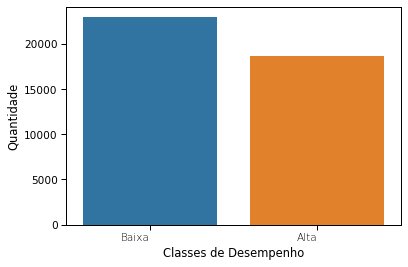

In [6]:
# ver o balanceamento das classes
print(professoresDF.nivelMatematica.value_counts())
#print("\nFraudes representam {:.4f}% do dataset.\n".format((professoresDF[professoresDF.nivelMatematica == 1].shape[0] / professoresDF.shape[0]) * 100))


#plt.figure(figsize=(10,5))
sns.set_context("paper",font_scale=1.2)
plot = sns.countplot('nivelMatematica', data=professoresDF);
pyplot.xticks(
   #rotation=45, 
   horizontalalignment='right',
   fontweight='light',
   #fontsize='x-large'  
)
#pyplot.legend(loc='upper right')
plot.set(xlabel='Classes de Desempenho',ylabel='Quantidade')
#leg = plot.get_legend()sns.color_palette("tab10")
sns.color_palette("tab10")
sns.color_palette("hls", 8)

## Separando as variáveis x e y

In [7]:
from  sklearn.model_selection  import train_test_split

In [8]:
x = professoresDF.drop(['nivelMatematica','nivelCiencias'],axis=1) # 
y = professoresDF['nivelMatematica'] 


In [9]:
x

,TC001Q01NA,TC002Q01NA,TC186Q01HA,TC005Q01NA,TC007Q01NA,TC007Q02NA,TC188Q01HA,TC014Q01HA,TC015Q01NA,TC018Q01NA,...,TC192Q01HA,TC192Q02HA,TC192Q05HA,TC176Q01HA,TC176Q02HA,TC176Q03HA,TC176Q06HA,TC176Q07HA,TC172Q01HA,TC173Q01HA
0,1.0,40.0,1.0,1.0,10.0,10.0,1.0,2.0,1.0,1.0,...,3.0,3.0,3.0,4.0,3.0,4.0,3.0,4.0,2.0,2.0
1,2.0,26.0,1.0,1.0,5.0,5.0,1.0,1.0,1.0,0.0,...,2.0,2.0,2.0,4.0,4.0,4.0,4.0,4.0,2.0,4.0
2,2.0,38.0,1.0,1.0,11.0,16.0,1.0,2.0,1.0,0.0,...,3.0,3.0,3.0,4.0,5.0,5.0,4.0,4.0,3.0,5.0
3,1.0,42.0,1.0,1.0,2.0,3.0,1.0,2.0,1.0,0.0,...,2.0,2.0,3.0,2.0,3.0,4.0,2.0,4.0,2.0,3.0
4,1.0,30.0,1.0,1.0,5.0,5.0,1.0,1.0,1.0,0.0,...,2.0,3.0,3.0,5.0,5.0,5.0,4.0,5.0,2.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41682,2.0,63.0,1.0,1.0,18.0,39.0,2.0,2.0,1.0,0.0,...,3.0,3.0,3.0,5.0,4.0,5.0,2.0,5.0,4.0,3.0
41683,1.0,49.0,1.0,2.0,14.0,14.0,1.0,1.0,1.0,1.0,...,3.0,2.0,2.0,5.0,5.0,5.0,3.0,4.0,2.0,2.0
41684,1.0,42.0,1.0,1.0,6.0,17.0,1.0,1.0,1.0,0.0,...,3.0,3.0,3.0,5.0,3.0,4.0,2.0,4.0,2.0,3.0
41685,2.0,25.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,...,3.0,3.0,3.0,5.0,4.0,4.0,3.0,4.0,1.0,3.0


In [10]:
y

0        Baixa
1        Baixa
2        Baixa
3        Baixa
4        Baixa
         ...  
41682     Alta
41683     Alta
41684     Alta
41685     Alta
41686     Alta
Name: nivelMatematica, Length: 41687, dtype: object

##  Split do dataset  em treinamento e teste

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.30)

### Verificando o formato dos dados de treinamento e teste

In [12]:
x_train.shape,x_test.shape

((29180, 83), (12507, 83))

In [13]:
y_train.shape,y_test.shape

((29180,), (12507,))

## Preparando o classificador  de árvore de decisão

In [14]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz


In [15]:
dtree =  DecisionTreeClassifier()
dtree.fit(x_train,y_train)

DecisionTreeClassifier()

In [16]:
pred =dtree.predict(x_test)

In [17]:
dtree.feature_importances_

array([0.00335333, 0.02449479, 0.02014908, 0.01674523, 0.02708994,
       0.01651558, 0.01137923, 0.0140875 , 0.00489067, 0.00798759,
       0.00302511, 0.03628483, 0.00326384, 0.06608451, 0.00988371,
       0.00518428, 0.00765944, 0.00570494, 0.01424982, 0.00434473,
       0.01059346, 0.00376474, 0.0044751 , 0.00379803, 0.00535463,
       0.01327153, 0.00464777, 0.00674048, 0.03510376, 0.00702198,
       0.2155499 , 0.00364751, 0.00427448, 0.00300136, 0.00498284,
       0.0067681 , 0.00953117, 0.00531692, 0.02518258, 0.00901406,
       0.00562663, 0.00726847, 0.00620927, 0.00575531, 0.00571852,
       0.00434062, 0.00337587, 0.00725492, 0.00608141, 0.00544649,
       0.00465523, 0.00331565, 0.00696001, 0.00425107, 0.00395724,
       0.00402668, 0.00716171, 0.00460255, 0.00593917, 0.00937489,
       0.00395842, 0.00434978, 0.00869757, 0.00281978, 0.00543949,
       0.00467522, 0.00860077, 0.04152565, 0.01088558, 0.00577157,
       0.00708989, 0.0037613 , 0.00513101, 0.00314027, 0.00456

## Avaliando o modelo

In [18]:
for  feature, importancia in zip(professoresDF.columns,dtree.feature_importances_):
    print("{} , {}".format(feature,importancia))

TC001Q01NA , 0.0033533301227025225
TC002Q01NA , 0.02449478912137058
TC186Q01HA , 0.020149081851635966
TC005Q01NA , 0.01674523139710297
TC007Q01NA , 0.027089941793183393
TC007Q02NA , 0.016515579231026936
TC188Q01HA , 0.011379234407384867
TC014Q01HA , 0.014087502649307903
TC015Q01NA , 0.00489067198787065
TC018Q01NA , 0.007987586768051523
TC018Q02NA , 0.0030251115410669257
TC018Q04NA , 0.036284827653807965
TC018Q05NA , 0.003263840711739667
TC018Q10NA , 0.06608451480331157
TC018Q11NA , 0.009883711068026345
TC045Q09NA , 0.00518428172715698
TC193Q01HA , 0.007659443555730651
TC193Q02HA , 0.005704942756505626
TC020Q01NA , 0.014249815445515287
TC175Q01HA , 0.0043447327996040605
TC198Q01HA , 0.010593463932687855
TC198Q02HA , 0.0037647393581679484
TC198Q03HA , 0.004475099111634166
TC198Q06HA , 0.0037980307859050567
TC198Q07HA , 0.005354625289576331
TC198Q08HA , 0.01327152654613811
TC198Q10HA , 0.004647766296509932
TC199Q01HA , 0.006740481376281524
TC199Q02HA , 0.03510376113930355
TC199Q03HA , 0.0

In [19]:
from sklearn.metrics import  classification_report, confusion_matrix

In [20]:

print(classification_report(y_test,pred))

              precision    recall  f1-score   support

        Alta       0.78      0.77      0.77      5587
       Baixa       0.81      0.82      0.82      6920

    accuracy                           0.80     12507
   macro avg       0.79      0.79      0.79     12507
weighted avg       0.80      0.80      0.80     12507



In [21]:
print(confusion_matrix(y_test,pred))

[[4299 1288]
 [1248 5672]]


## Matthews correlation coefficient (MCC).

In [22]:
from sklearn.metrics import matthews_corrcoef
matthews_corrcoef(y_test, pred)

0.5895368799959206